In [1]:
#simulate (roughly!) the moving group content

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [3]:
bdratio = 8
# how many stars for each brown dwarf?  (M<m_max only)
m_max = 0.030
m_min = 0.005
imf_alpha = 0.6
#calculate (included below) is about 1/2 of brown dwarfs lie in this range
# so if we have 4 stars per BD (all), we have 8 stars per BD (our range)
#extra fcator: To increase the number of BD's in a simulatrion
extra=100

In [4]:
#ratio calculation
f0=0.08**(1-imf_alpha)/(1-imf_alpha)
f1=m_max**(1-imf_alpha)/(1-imf_alpha)
f2=m_min**(1-imf_alpha)/(1-imf_alpha)
nf0=f0-f2
nf1=f1-f2
print(nf1/nf0)

0.5157307390774423


In [5]:
def mass_powerlaw(size,m0,m1,alpha):
    #dN/dM ~ M**(-alpha)
    factor1= (m1**(1-alpha)-m0**(1-alpha))
    factor2 = m0**(1-alpha)
    return (factor1*np.random.rand(size)+factor2)**(1/(1-alpha))

In [6]:
#read models
dirname='/Users/gizis/data/Models/CELLO'


In [7]:
allhotname='{0}/{1}/hot.all.txt'.format(dirname,'Hot_Start_evolution_models')
allhot=ascii.read(allhotname)
allucoldname='{0}/{1}/ucold.all.txt'.format(dirname,'Ultracold_Start_evolution_models')
allcold=ascii.read(allucoldname)
allcoolname='{0}/{1}/cool.all.txt'.format(dirname,'Cool_Start_evolution_models')
allcool=ascii.read(allcoolname)

In [8]:
from scipy.interpolate import LinearNDInterpolator
#simple interpolation is adequate

In [9]:
CELLO_interp_logTeff =  LinearNDInterpolator ((allhot['col13'],allhot['col3']/1e6),allhot['col11'],rescale=True)
CELLO_interp_logL =  LinearNDInterpolator ((allhot['col13'],allhot['col3']/1e6),allhot['col12'],rescale=True)
CELLO_cold_interp_logTeff =  LinearNDInterpolator ((allcold['col13'],allcold['col3']/1e6),allcold['col11'],rescale=True)
CELLO_cold_interp_logL =  LinearNDInterpolator ((allcold['col13'],allcold['col3']/1e6),allcold['col12'],rescale=True)
CELLO_cool_interp_logTeff =  LinearNDInterpolator ((allcool['col13'],allcool['col3']/1e6),allcool['col11'],rescale=True)
CELLO_cool_interp_logL =  LinearNDInterpolator ((allcool['col13'],allcool['col3']/1e6),allcool['col12'],rescale=True)


In [10]:
# Now read the moving group data: first the ages
# note that there are extra blank columns, but who cares?
mg_ages=ascii.read('MG/MG_ages.csv',format='csv')
gizis1=ascii.read('MG/gizis_count_1.csv')
#files 1, 2, 3 were made from MOCA Database: https://mocadb.ca/query

In [11]:
mg_ages

Moca,age,col2,_1,_2,_3,_4
str9,float64,int64,int64,int64,int64,int64
ABDMGC,149.0,--,--,--,--,--
CHAN,3.7,--,--,--,--,--
LAB4,130.0,--,--,--,--,--
CARN,200.0,--,--,--,--,--
OCTN,40.0,--,--,--,--,--
OCT,40.0,--,--,--,--,--
...,...,...,...,...,...,...
THEIA63,15.1,--,--,--,--,--
GRSCOS18,8.2,--,--,--,--,--


In [12]:
gizis1

moca_aid,nmem
str9,int64
ABDMG,879
CUMA,644
CHYA,625
HYA,483
THA,365
COL,357
...,...
RHEA125,1
HSC1630,1


In [13]:
age_dict = dict(zip(mg_ages['Moca'], mg_ages['age'])) 


In [14]:
#print the associations that have ages. only included ages<200 Myr
for name in gizis1['moca_aid']:
    if name in age_dict.keys():
        print(name,age_dict[name])


ABDMG 133.0
THA 51.0
COL 42.0
BPMG 26.0
ARG 50.0
CARN 45.0
CVCA 89.0
TWA 10.0
GRSCO 25.0
VCA 89.0
SVCA 89.0
OCTN 40.0
OCT 40.0
THOR 25.0
THEIA1274 13.5
EPSC 3.7
ETAC 6.5


In [15]:
masses=np.array([])
ages=np.array([])
for i,name in enumerate(gizis1['moca_aid']):
    if name in age_dict.keys():
        #print(i,name,gizis1['nmem'][i])   #check not used
        nbd = np.round(gizis1['nmem'][i] / bdratio).astype(int)
        print("Association: {0:10s}  Age (Myr): {1:5.1f}  N_BD: {2}".format(name,age_dict[name],nbd))  #check, looks good
        new_masses=mass_powerlaw(nbd*extra,m_min,m_max,imf_alpha)
        new_ages=new_masses*0 + age_dict[name]
        masses=np.append(masses,new_masses)
        ages=np.append(ages,new_ages)

Association: ABDMG       Age (Myr): 133.0  N_BD: 110
Association: THA         Age (Myr):  51.0  N_BD: 46
Association: COL         Age (Myr):  42.0  N_BD: 45
Association: BPMG        Age (Myr):  26.0  N_BD: 37
Association: ARG         Age (Myr):  50.0  N_BD: 30
Association: CARN        Age (Myr):  45.0  N_BD: 28
Association: CVCA        Age (Myr):  89.0  N_BD: 14
Association: TWA         Age (Myr):  10.0  N_BD: 11
Association: GRSCO       Age (Myr):  25.0  N_BD: 9
Association: VCA         Age (Myr):  89.0  N_BD: 6
Association: SVCA        Age (Myr):  89.0  N_BD: 4
Association: OCTN        Age (Myr):  40.0  N_BD: 4
Association: OCT         Age (Myr):  40.0  N_BD: 4
Association: THOR        Age (Myr):  25.0  N_BD: 3
Association: THEIA1274   Age (Myr):  13.5  N_BD: 3
Association: EPSC        Age (Myr):   3.7  N_BD: 2
Association: ETAC        Age (Myr):   6.5  N_BD: 2


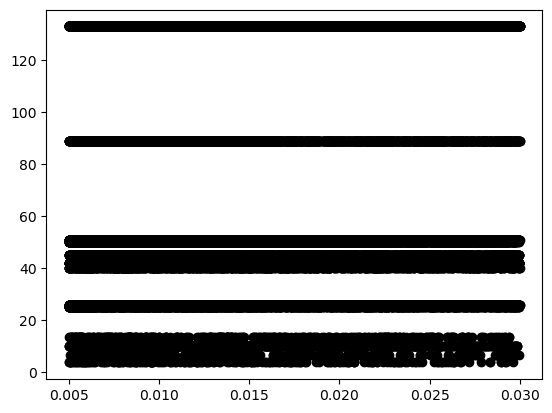

In [16]:
plt.plot(masses,ages,'ko')

(array([ 1800.,  4900.,  5300., 10400.,     0.,     0.,  2400.,     0.,
            0., 11000.]),
 array([  3.7 ,  16.63,  29.56,  42.49,  55.42,  68.35,  81.28,  94.21,
        107.14, 120.07, 133.  ]),
 <BarContainer object of 10 artists>)

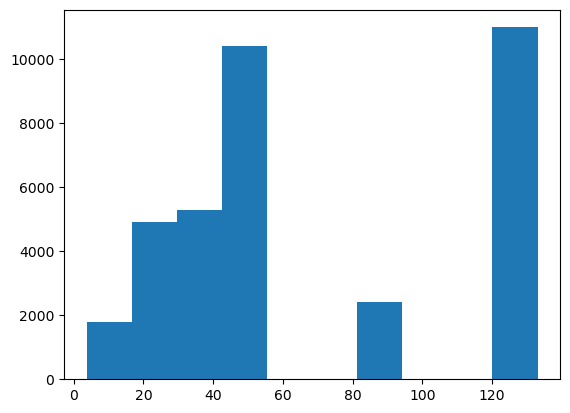

In [17]:
plt.hist(ages)

(array([6005., 4720., 4129., 3902., 3420., 3057., 2753., 2808., 2593.,
        2413.]),
 array([0.00500003, 0.00749999, 0.00999994, 0.0124999 , 0.01499986,
        0.01749981, 0.01999977, 0.02249973, 0.02499968, 0.02749964,
        0.0299996 ]),
 <BarContainer object of 10 artists>)

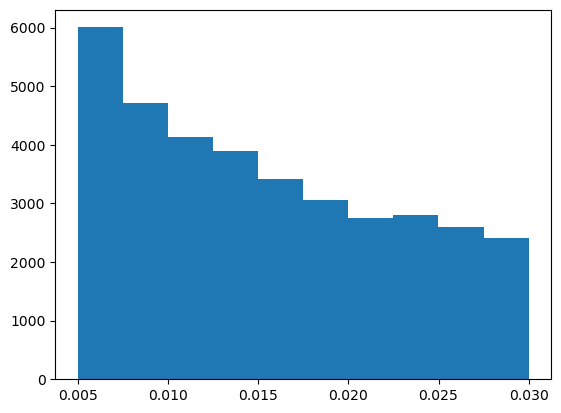

In [18]:
plt.hist(masses)

In [19]:
mg_logTeff=CELLO_interp_logTeff(masses,ages)
mg_logL=CELLO_interp_logL(masses,ages)
mg_Teff=10**mg_logTeff

(array([3463., 3920., 8808., 3727., 5226., 4496., 4414., 1242.,  413.,
          91.]),
 array([ 552.13549015,  803.79473905, 1055.45398794, 1307.11323683,
        1558.77248573, 1810.43173462, 2062.09098352, 2313.75023241,
        2565.4094813 , 2817.0687302 , 3068.72797909]),
 <BarContainer object of 10 artists>)

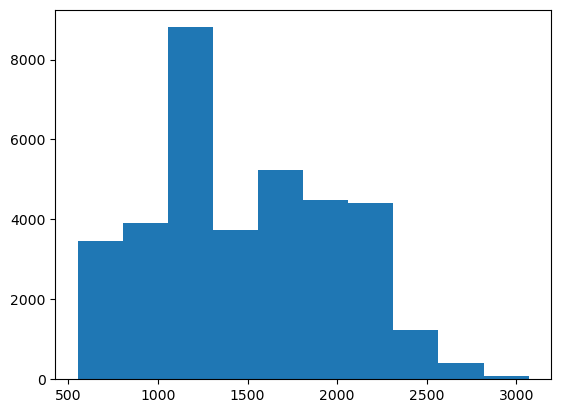

In [20]:
plt.hist(10.0**mg_logTeff)

(array([2499., 3720., 9495., 6261., 9146., 3951.,  297.,  316.,   71.,
          44.]),
 array([-5.91592617, -5.40554189, -4.89515761, -4.38477333, -3.87438905,
        -3.36400478, -2.8536205 , -2.34323622, -1.83285194, -1.32246766,
        -0.81208338]),
 <BarContainer object of 10 artists>)

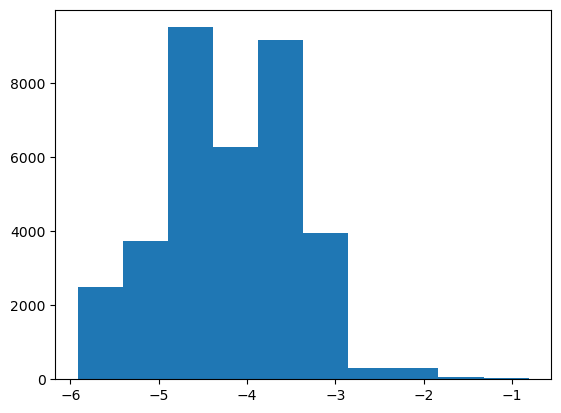

In [21]:
plt.hist(mg_logL)

In [22]:
#now the pleiades
n_star = 1300
n_bd = np.round(n_star/ bdratio).astype(int)
pl_masses= mass_powerlaw(n_bd*extra,m_min,m_max,imf_alpha)
pl_ages = pl_masses*0 + 125.0
pl_logTeff=CELLO_interp_logTeff(pl_masses,pl_ages)
pl_logL=CELLO_interp_logL(pl_masses,pl_ages)
pl_Teff= 10**pl_logTeff

(array([2270., 1700., 1190.,  767., 2865., 2440., 1358., 1236., 1283.,
        1091.]),
 array([ 561.26898363,  693.05077646,  824.83256929,  956.61436212,
        1088.39615495, 1220.17794778, 1351.95974061, 1483.74153344,
        1615.52332627, 1747.3051191 , 1879.08691193]),
 <BarContainer object of 10 artists>)

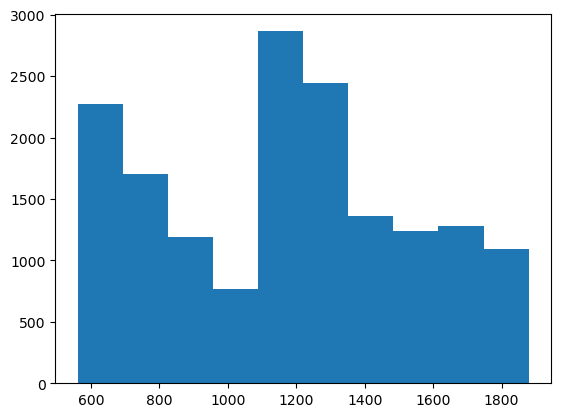

In [23]:
plt.hist(10**pl_logTeff)

In [24]:
k23bins=np.array([300,450,600,750,900,1050,1200,1350,1500,1650,1800,1950,2100,2250])
t100bins=np.arange(300,2200,100.0)
pl_hist,bb=np.histogram(pl_Teff,bins=k23bins)
mg_hist,bb=np.histogram(mg_Teff,bins=k23bins)
##bb will be the same as k23bins
pl_hist100,bb1=np.histogram(pl_Teff,bins=t100bins)
mg_hist100,bb1=np.histogram(mg_Teff,bins=t100bins)


In [25]:
pl_hist100

array([   0,    0,  733, 1649, 1333, 1027,  678,  576, 2216, 2261, 1247,
       1048,  934,  984,  853,  661,    0,    0])

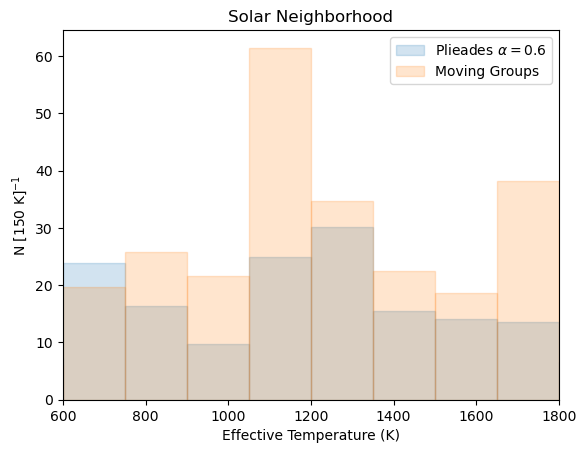

In [26]:
#plt.errorbar(sims_60['Teff'][1:-1],sims_60['K23'][1:-1],yerr=sims_80['K23err'][1:-1],marker='o',color='k',linestyle='',label='Observed')
plt.bar(k23bins[:-1]+75,pl_hist/extra,align='center',width=150,edgecolor='C0',label=r'Plieades $\alpha=0.6$',fill=True,alpha=0.2)
plt.bar(k23bins[:-1]+75,mg_hist/extra,align='center',width=150,edgecolor='C1',label=r'Moving Groups',fill=True,alpha=0.2)
plt.xlabel('Effective Temperature (K)')
plt.ylabel(r'N [150 K]$^{-1}$')
plt.xlim(600,1800)
plt.title('Solar Neighborhood')
#plt.bar(sims['Teff'],sims['Simple-B']*k23norm/sbnorm,align='center',width=150,color='C0',label='Simple-Bobcat')
plt.legend()
#plt.savefig('fig-space-density-thick-disk.pdf')
#

Text(0.5, 0.98, 'Moving Groups and Pleiades')

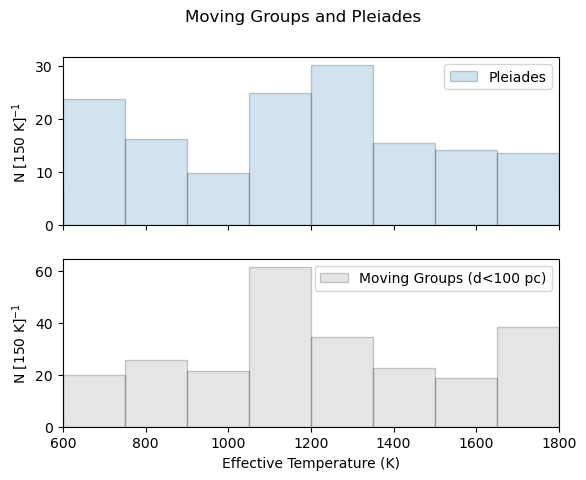

In [27]:
#now make it two panels in one figure
fig,(ax0,ax1) = plt.subplots(2,1,sharex=True)
ax0.bar(k23bins[:-1]+75,pl_hist/extra,align='center',width=150,edgecolor='k',
        label=r'Pleiades',fill=True,alpha=0.2,facecolor='C0')
ax1.bar(k23bins[:-1]+75,mg_hist/extra,align='center',width=150,edgecolor='k',
        label=r'Moving Groups (d<100 pc)',fill=True,alpha=0.2,facecolor='grey')
plt.xlabel('Effective Temperature (K)')
ax1.set_ylabel(r'N [150 K]$^{-1}$')
ax0.set_ylabel(r'N [150 K]$^{-1}$')
ax1.legend()
ax0.legend()
plt.xlim(600,1800)
fig.suptitle('Moving Groups and Pleiades')


In [ ]:
#now make it two panels in one figure
fig,(ax0,ax1) = plt.subplots(2,1,sharex=True)
ax0.bar(t100bins[:-1]+50,pl_hist100/extra,align='center',width=100,edgecolor='k',
        label=r'Pleiades',fill=True,alpha=0.2,facecolor='C0')
ax1.bar(t100bins[:-1]+50,mg_hist100/extra,align='center',width=100,edgecolor='k',
        label=r'Moving Groups (d<100 pc)',fill=True,alpha=0.2,facecolor='grey')
plt.xlabel('Effective Temperature (K)')
ax1.set_ylabel(r'N [100 K]$^{-1}$')
ax0.set_ylabel(r'N [100 K]$^{-1}$')
ax1.legend()
ax0.legend()
plt.xlim(600,1800)
fig.suptitle('Moving Groups and Pleiades')
plt.savefig('fig-teff-numbers.pdf')

Text(0, 0.5, 'Teff')

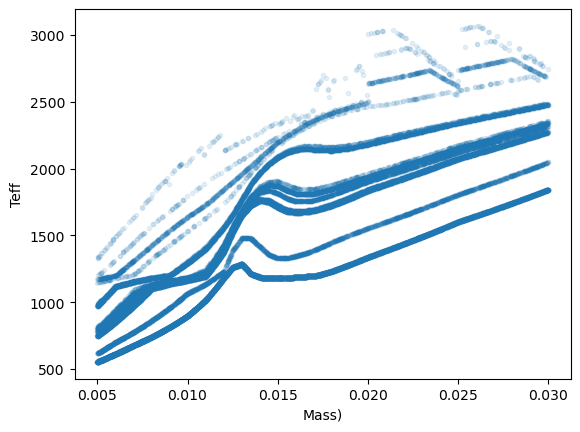

In [38]:
plt.plot(masses,mg_Teff,'.',alpha=0.10)
#plt.xlim(10,250)
plt.xlabel('Mass)')
plt.ylabel('Teff')
#hwat you can see is that the 1100K bump in the Moving Groups is objects below the D-burning limit
# The D-burning sequence is at different temperatures and is smeared out. 


Text(0, 0.5, 'Teff')

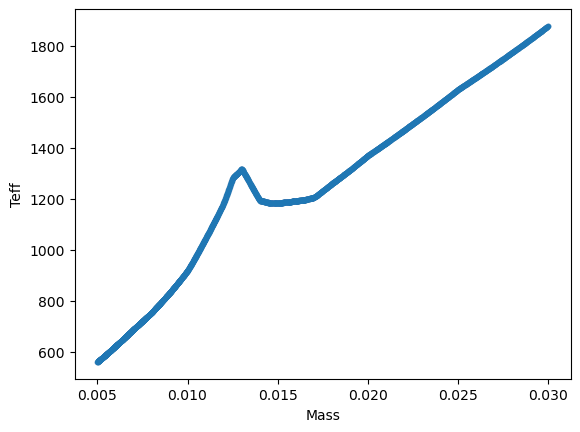

In [37]:
plt.plot(pl_masses,pl_Teff,'.',alpha=0.10)
#plt.xlim(10,250)
plt.xlabel('Mass')
plt.ylabel('Teff')
#meanwhile, in the pleiasdes the bump is the D-burning objects on top of the more massive objects, so 0.010 to 0.020 .  